In [31]:
import pandas as pd
import seaborn as sns
import warnings
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [9]:
file_path = 'dataKasus-1.xlsx'

In [10]:
# Load data 
df = pd.read_excel(file_path, sheet_name='2022')

# Tampilkan beberapa baris pertama
df.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [11]:
# Langkah 1: Hapus kolom 'Unnamed: 12' yang tidak diperlukan
df_cleaned = df.drop(columns=['Unnamed: 12'])

# Langkah 2: Konversi kolom 'USIA' menjadi numerik dengan mengekstrak digitnya
df_cleaned['USIA'] = df_cleaned['USIA'].str.extract(r'(\d+)').astype(float)

# Langkah 3: Standarisasi kolom biner menjadi format 1/0 menggunakan map()
binary_cols = ['RIW HIPERTENSI', 'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA', 'SOSEK RENDAH', 'PE/Non PE']

# Definisikan fungsi mapping untuk kolom biner
binary_mapping = lambda x: 1 if x == 'Ya' or x == 'PE' else 0

# Terapkan mapping pada kolom biner menggunakan .map()
df_cleaned[binary_cols] = df_cleaned[binary_cols].apply(lambda col: col.map(binary_mapping))

# Tampilkan data yang sudah dibersihkan
df_cleaned.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE
0,1,NAMA 1,23.0,3,< 2 tahun,0,0,0,1,0,0,0
1,2,NAMA 2,29.0,2,< 2 tahun,0,0,0,0,0,0,1
2,3,NAMA 3,20.0,1,anak pertama,0,0,0,0,0,0,0
3,4,NAMA 4,18.0,1,anak pertama,0,0,0,0,0,0,0
4,5,NAMA 5,34.0,3,> 2 tahun,0,0,0,0,0,0,0


In [20]:
# Membaca data ke dalam dataframe (pastikan sheet_name benar)
data = pd.read_excel(file_path, sheet_name='2022')  # Gantilah '2022' dengan nama sheet yang sesuai

# Normalisasi format kolom USIA
data['USIA'] = data['USIA'].astype(str)  # Mengubah menjadi string
data['USIA'] = data['USIA'].replace({'> 2 tahun': '3', '< 1 tahun': '0'})  # Ganti nilai
data['USIA'] = data['USIA'].str.replace(' TH', '', case=False)  # Menghapus ' TH'
data['USIA'] = data['USIA'].str.replace(' th', '', case=False)  # Menghapus ' th'
data['USIA'] = data['USIA'].str.replace(' tahun', '', case=False)  # Menghapus ' tahun'

In [21]:
# Mengonversi kolom 'USIA' ke float setelah pembersihan
data['USIA'] = pd.to_numeric(data['USIA'], errors='coerce')  # Mengubah menjadi float dan mengabaikan error

In [22]:
# Memastikan kolom 'PARITAS' adalah tipe string sebelum melakukan penggantian
data['PARITAS'] = data['PARITAS'].astype(str)  # Mengubah menjadi string
data['PARITAS'] = data['PARITAS'].replace({'0': '0', '1': '1'})  # Gantilah nilai sesuai yang diinginkan
data['PARITAS'] = data['PARITAS'].astype(float)  # Mengubah menjadi numeric

In [23]:
# Mengisi nilai NaN dengan median
data['USIA'] = data['USIA'].fillna(data['USIA'].median())  # Mengisi NaN dengan median
data['PARITAS'] = data['PARITAS'].fillna(data['PARITAS'].median())  # Mengisi NaN dengan median

In [24]:
#Menyiapkan data untuk model
X = data[['USIA', 'PARITAS']]  # Fitur
y = data['PE/Non PE']  # Target

In [25]:
#Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Membangun model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Menguji model
y_pred = model.predict(X_test)

In [32]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 90.27%


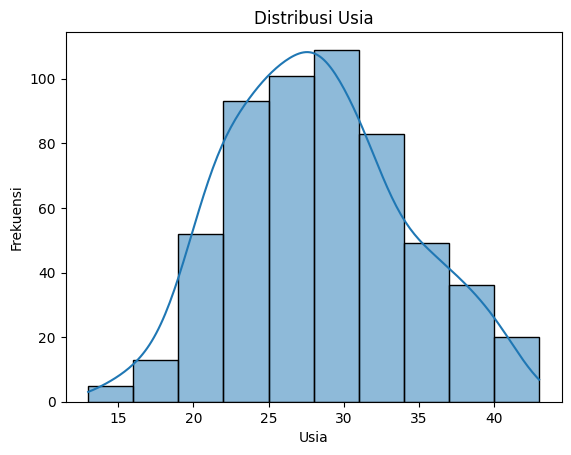

In [35]:
# Visualisasi distribusi usia
sns.histplot(data['USIA'], bins=10, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

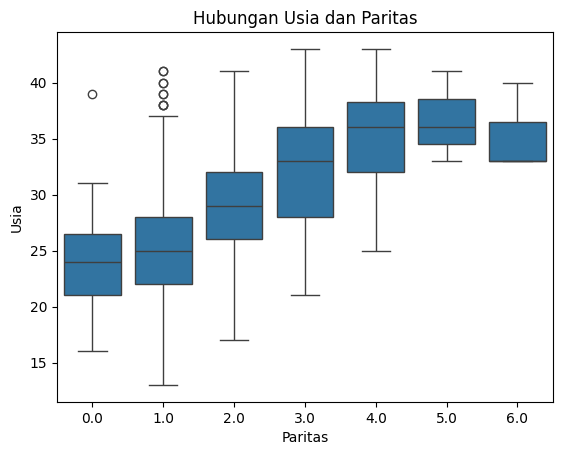

In [36]:
sns.boxplot(x='PARITAS', y='USIA', data=data)
plt.title('Hubungan Usia dan Paritas')
plt.xlabel('Paritas')
plt.ylabel('Usia')
plt.show()

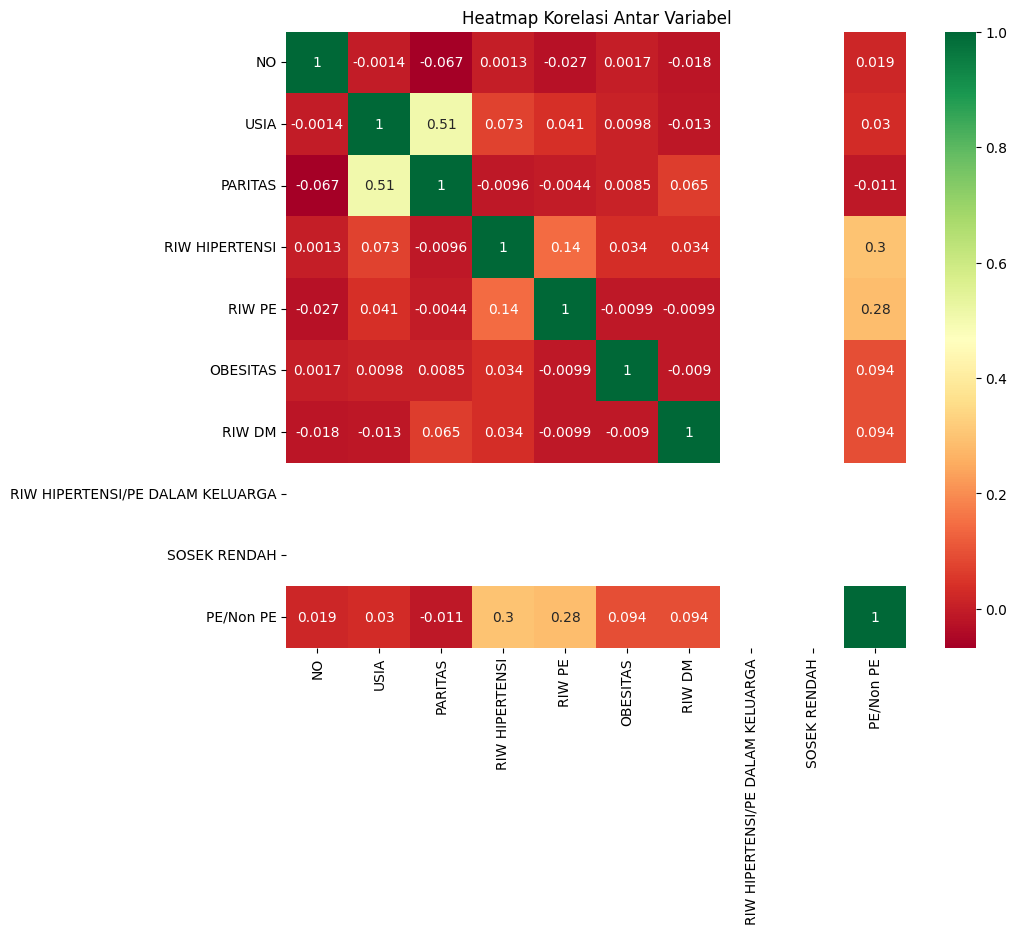

In [37]:
# Hanya memilih kolom numerik untuk analisis korelasi
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Korelasi antar variabel numerik
correlation_matrix = numeric_cols.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

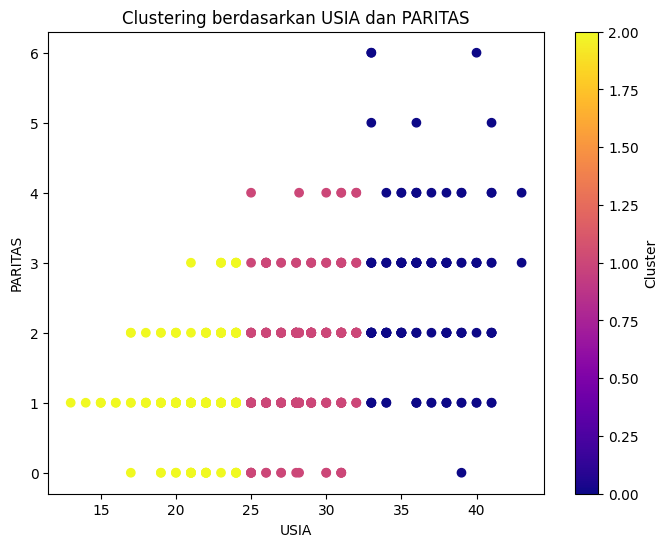

In [38]:
# Tetapkan variabel lingkungan untuk menghindari peringatan LOKY_MAX_CPU_COUNT
os.environ['LOKY_MAX_CPU_COUNT'] = '4'
warnings.filterwarnings("ignore", message=".*LOKY_MAX_CPU_COUNT*")

# Hapus kolom 'Unnamed: 12'
df_cleaned = df.drop(columns=['Unnamed: 12'])

# Ubah kolom 'USIA' menjadi numerik dengan mengekstrak digitnya
df_cleaned['USIA'] = df_cleaned['USIA'].str.extract(r'(\d+)').astype(float)

# Tangani nilai yang hilang dengan mengisinya dengan mean
imputer = SimpleImputer(strategy='mean')
X = df_cleaned[['USIA', 'PARITAS']]
X_imputed = imputer.fit_transform(X)

# Melakukan pengelompokan menggunakan K-Means pada data yang diimputasi
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X_imputed)

# Visualisasi hasil pengelompokan dengan palet warna yang diperbarui
plt.figure(figsize=(8, 6))
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=df_cleaned['Cluster'], cmap='plasma')  # Changed to 'plasma' color map
plt.xlabel('USIA')
plt.ylabel('PARITAS')
plt.title('Clustering berdasarkan USIA dan PARITAS')
plt.colorbar(label='Cluster')
plt.show()

                        precision    recall  f1-score   support

                Non PE       0.91      0.98      0.94       102
                    PE       0.00      0.00      0.00         6
                   PE        0.00      0.00      0.00         1
                   PEB       0.00      0.00      0.00         4
PEB impending eklampsi       0.00      0.00      0.00         0

              accuracy                           0.88       113
             macro avg       0.18      0.20      0.19       113
          weighted avg       0.82      0.88      0.85       113



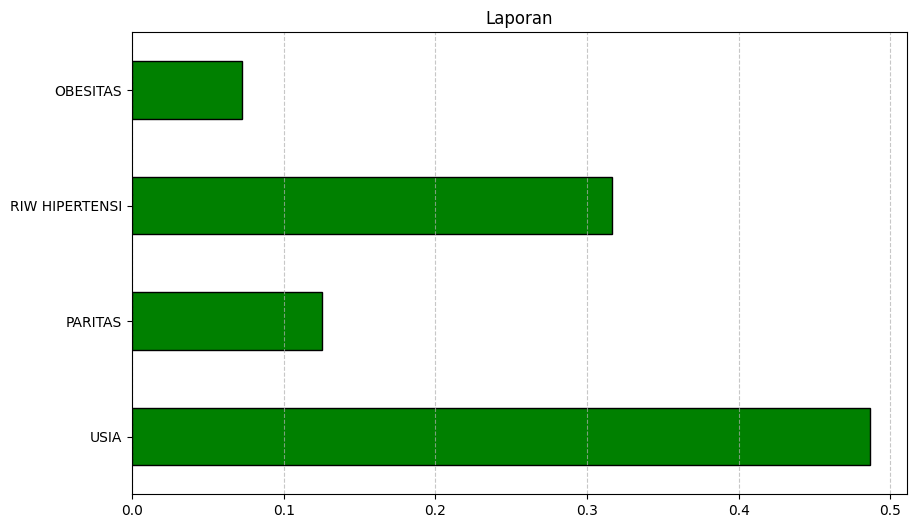

In [39]:
# Definisikan fitur dan label (target)
X = df_cleaned[['USIA', 'PARITAS', 'RIW HIPERTENSI', 'OBESITAS']]
y = df_cleaned['PE/Non PE']

# Label encoding untuk kolom kategorikal
label_encoder = LabelEncoder()

# Menggunakan .loc untuk menghindari SettingWithCopyWarning
X.loc[:, 'RIW HIPERTENSI'] = label_encoder.fit_transform(X['RIW HIPERTENSI'])
X.loc[:, 'OBESITAS'] = label_encoder.fit_transform(X['OBESITAS'])

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Decision Tree
model = DecisionTreeClassifier()

# Melatih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred, zero_division=0))

# Visualisasi pentingnya fitur dalam model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='Green', title='Laporan', edgecolor='black')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

                        precision    recall  f1-score   support

                Non PE       0.91      0.98      0.94       102
                    PE       0.00      0.00      0.00         6
                   PE        0.00      0.00      0.00         1
                   PEB       0.00      0.00      0.00         4
PEB impending eklampsi       0.00      0.00      0.00         0

              accuracy                           0.88       113
             macro avg       0.18      0.20      0.19       113
          weighted avg       0.82      0.88      0.85       113



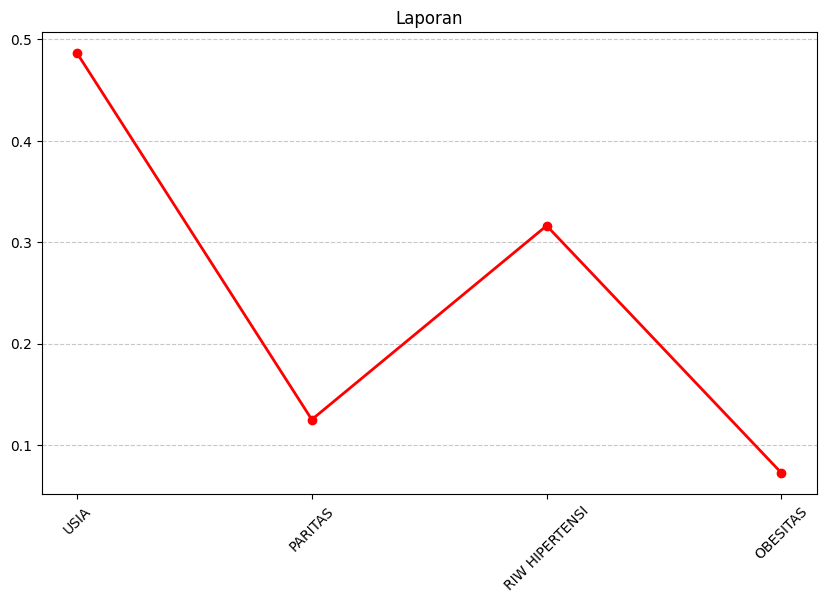

In [40]:
# Definisikan fitur dan label (target)
X = df_cleaned[['USIA', 'PARITAS', 'RIW HIPERTENSI', 'OBESITAS']]
y = df_cleaned['PE/Non PE']

# Label encoding untuk kolom kategorikal
label_encoder = LabelEncoder()

# Menggunakan .loc untuk menghindari SettingWithCopyWarning
X.loc[:, 'RIW HIPERTENSI'] = label_encoder.fit_transform(X['RIW HIPERTENSI'])
X.loc[:, 'OBESITAS'] = label_encoder.fit_transform(X['OBESITAS'])

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Decision Tree
model = DecisionTreeClassifier()

# Melatih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred, zero_division=0))

# Mendapatkan pentingnya fitur dalam model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Visualisasi pentingnya fitur dalam model menggunakan grafik garis
plt.figure(figsize=(10, 6))
plt.plot(feature_importances.index, feature_importances.values, marker='o', color='red', linestyle='-', linewidth=2)
plt.title('Laporan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()
